# Stacked bar plot from dataframe for multiple columns and rows

This notebook follows the example presented in my blog post, [Stacked Bar Plot From Pandas DataFrame](https://neuhofmo.github.io/stacked-bar-plot-from-pandas-dataframe/), and provides a clean implementation of the functions described.

In [1]:
# importing
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # for aesthetics

%matplotlib inline

# optional theme and palette for aesthetics
sns.set_context("paper")
sns.set(style="white", palette="muted", color_codes=True)

#### Loading the xlsx file

In [2]:
# loading the files from excel
df = pd.read_excel('groups_sum_demo.xlsx", index_col='Cell_line')

#### Normalizing the dataframe

In [3]:
def get_ratio_table(df):
    """The function receives a df and returns a row-ratio df."""
    df_sum = df.sum(axis=1)
    return df.div(df_sum, axis='index')

#### Plotting the stacked bar plot

In [4]:
def plot_stacked_bar_for_df(df, normalize=True, figsize=(10,8), ylabel="Fraction", xlabel="Group", fontsize=14, categories=None, color_list=None, output_filename=None):
    """Receives a dataframe and plots it as a stacked bar plot.
    Optional parameters are:
    normalize: normalize the dataframe according to each row. (default: True)
    categories: a sorted list of the categories to plot. (default: None, inferred from df)
    output_filename: if provided, saves
    color_list: a list of colors in matplotlib format (#XXXXXX or (0-1, 0-1, 0-1) RGB values, see matplotlib documentation). (default: random)
    figsize, ylabel, xlabel, fontsize: see matplotlib documentation.
    """

    if normalize:  # normalize to 1
        df = get_ratio_table(df)
    
    # get a list of all groups (categories)
    if not categories:  # if not already provided by the user
        categories = list(df.columns)
    
    if color_list:  # if the user provided a color list
        assert len(color_list) >= len(categories), "color_list is shorter then the number of categories plotted, cannot plot!"
    else:
        color_list = list(np.random.rand(3, len(categories)))  # generate a list of random colors
            
    
    # initialize figure
    plt.figure(figsize=figsize, dpi=300)
    
    # plot first group
    plt.bar(df.index, df[categories[0]], color=color_list[0])
    
    # plot all other groups
    for i in range(1, len(categories)):
        bot = sum(df[category] for category in categories[:i])  # starting point of this group
        plt.bar(df.index, df[categories[i]], bottom=bot, color=color_list[i])  # plot the current group
    
    # aesthetics
    plt.ylabel(ylabel, fontsize=fontsize)
    plt.xlabel(xlabel, fontsize=fontsize)
    
    sns.despine()  # for aesthetics
    
    # if output_filename provided, save the figure
    if output_filename:
        plt.savefig(output_filename)

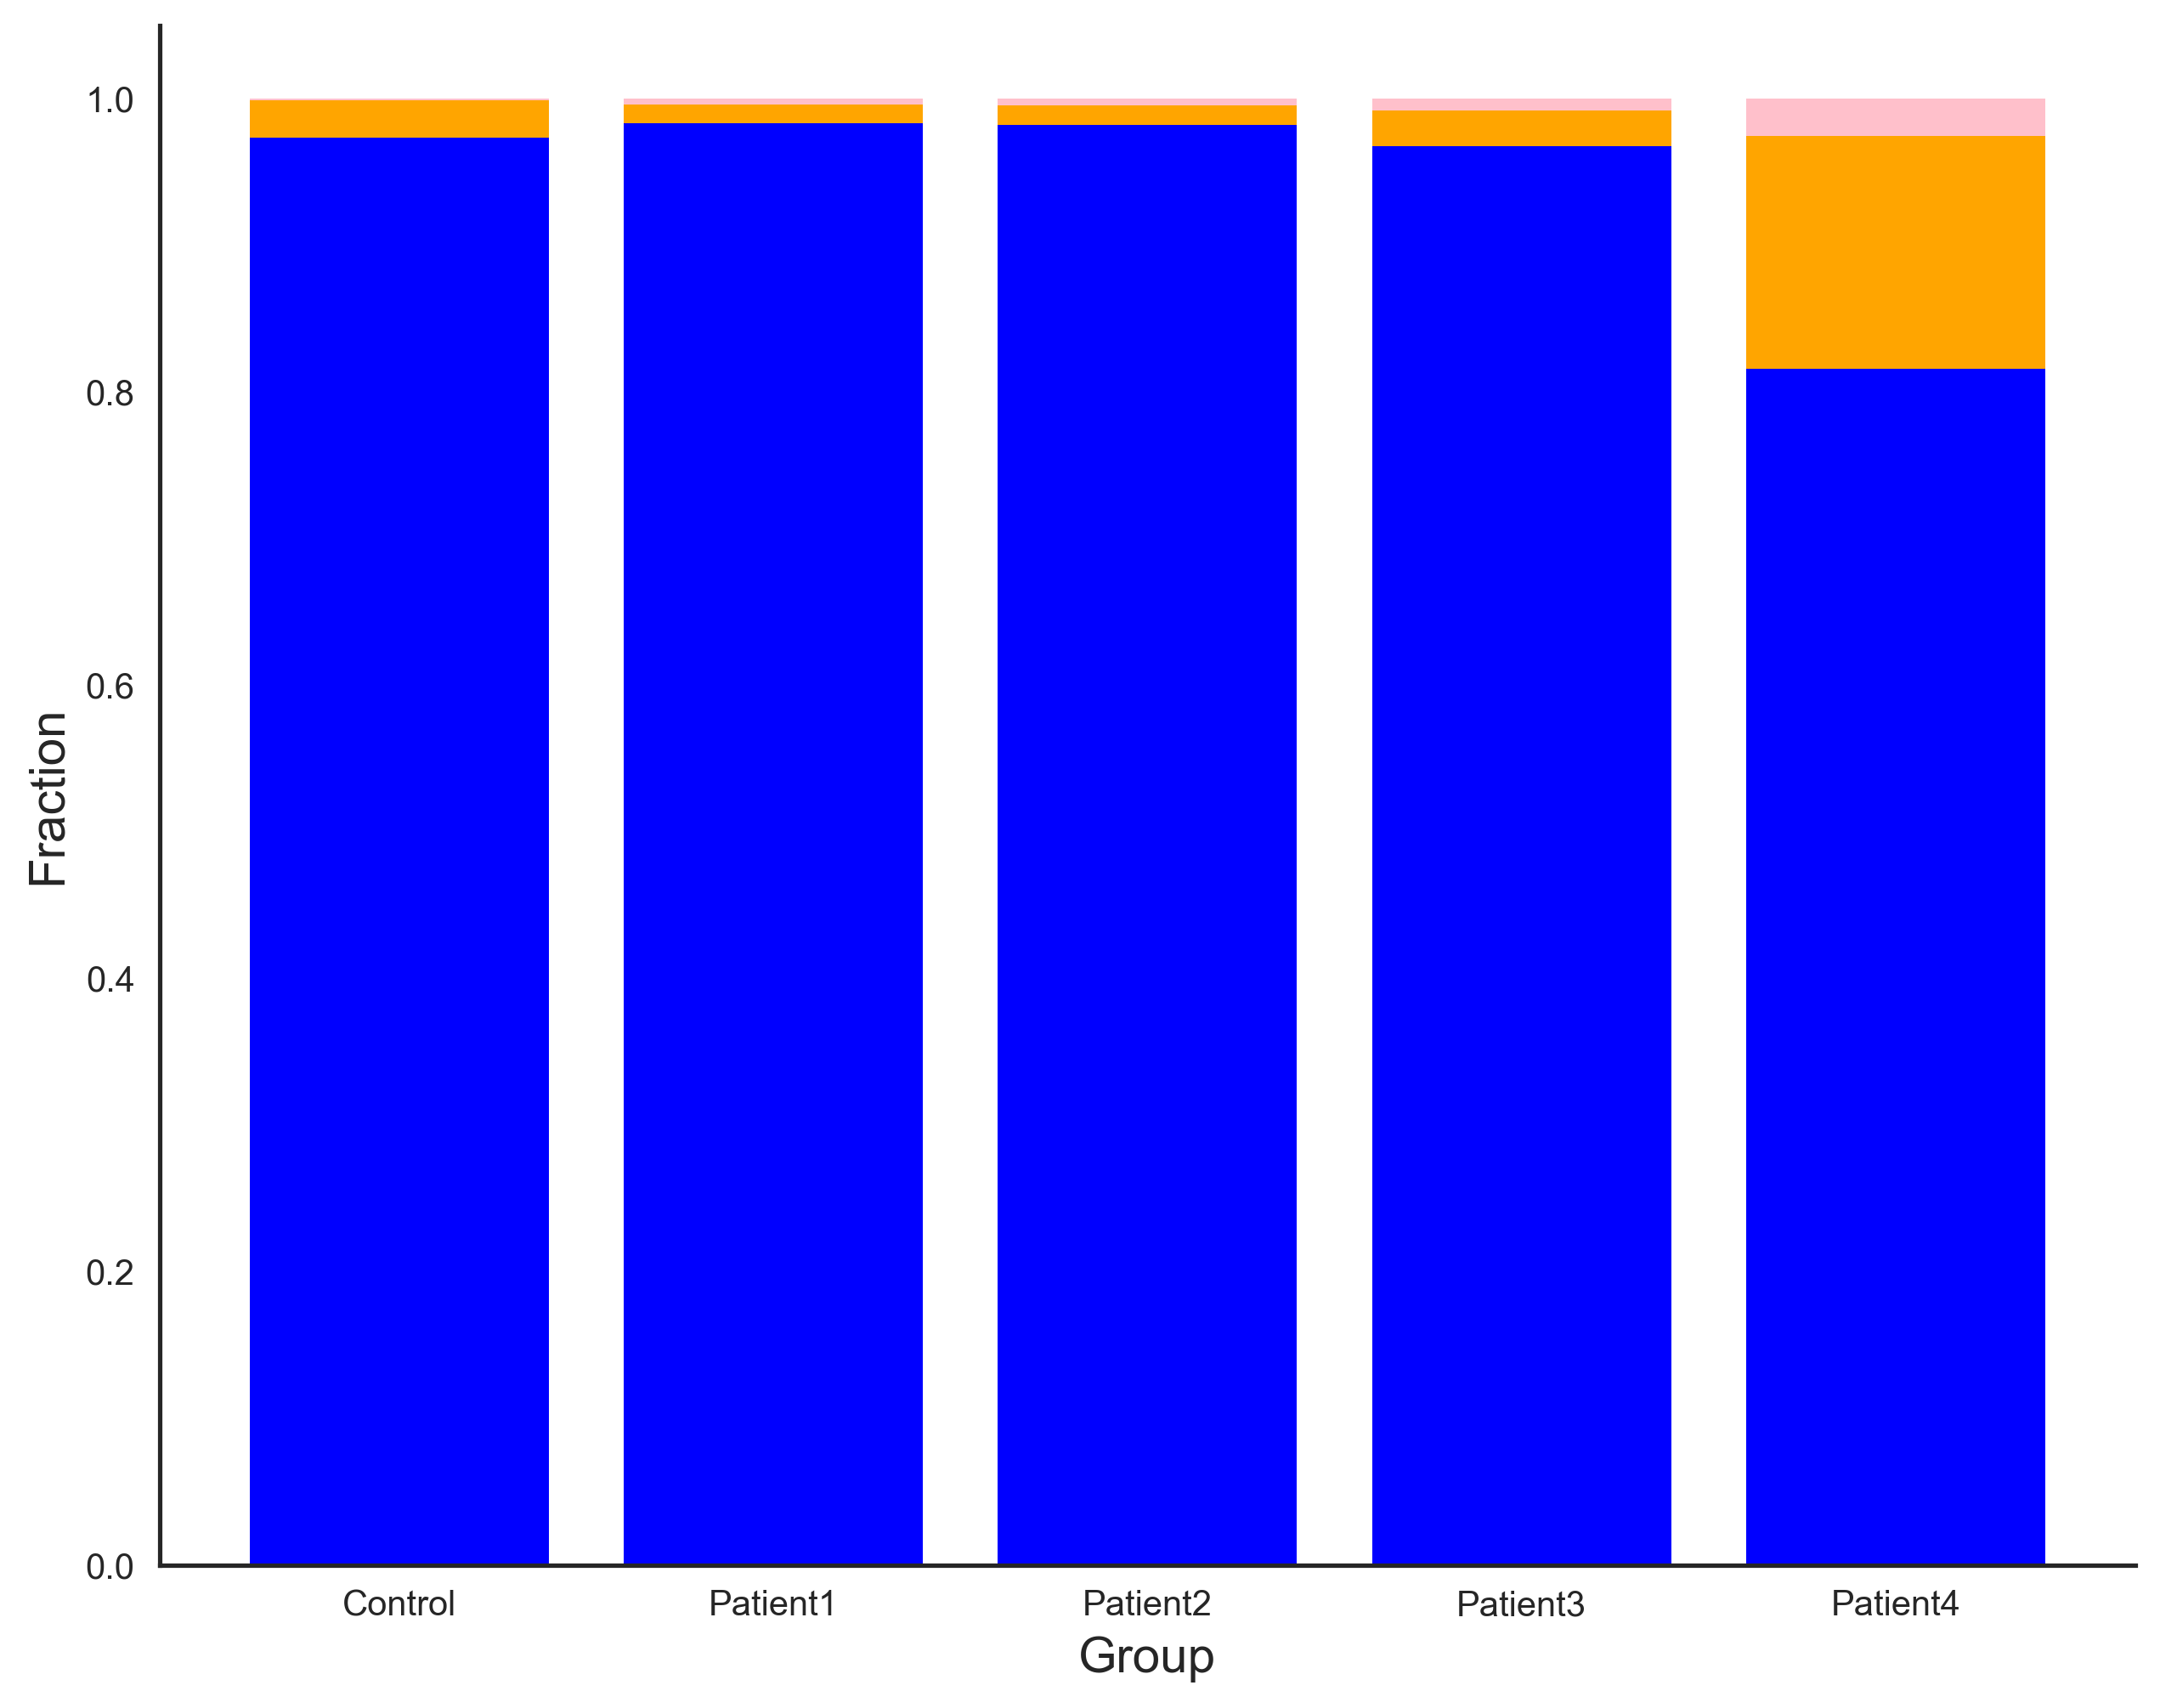

In [5]:
# plotting start bar plot with custom color list
plot_stacked_bar_for_df(df, color_list=['blue', 'orange', 'pink'])